# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Successful_Startups.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Encoding categorical data

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x= np.array(ct.fit_transform(x))

In [8]:
print(x)

[[1.0 0.0 0.0 165349.2 136897.8 471784.1]
 [0.0 1.0 0.0 162597.7 151377.59 443898.53]
 [0.0 0.0 1.0 153441.51 101145.55 407934.54]
 [1.0 0.0 0.0 144372.41 118671.85 383199.62]
 [0.0 0.0 1.0 142107.34 91391.77 366168.42]
 [1.0 0.0 0.0 131876.9 99814.71 362861.36]
 [0.0 1.0 0.0 134615.46 147198.87 127716.82]
 [0.0 0.0 1.0 130298.13 145530.06 323876.68]
 [1.0 0.0 0.0 120542.52 148718.95 311613.29]
 [0.0 1.0 0.0 123334.88 108679.17 304981.62]
 [0.0 0.0 1.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [0.0 0.0 1.0 93863.75 127320.38 249839.44]
 [0.0 1.0 0.0 91992.39 135495.07 252664.93]
 [0.0 0.0 1.0 119943.24 156547.42 256512.92]
 [1.0 0.0 0.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 91749.16 114175.79 294919.57]
 [1.0 0.0 0.0 86419.7 153514.11 0.0]
 [0.0 1.0 0.0 76253.86 113867.3 298664.47]
 [1.0 0.0 0.0 78389.47 153773.43 299737.29]
 [0.0 0.0 1.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=0)

In [9]:
print(x_train)

[[0.0 0.0 1.0 55493.95 103057.49 214634.81]
 [1.0 0.0 0.0 46014.02 85047.44 205517.64]
 [0.0 0.0 1.0 75328.87 144135.98 134050.07]
 [0.0 1.0 0.0 46426.07 157693.92 210797.67]
 [0.0 0.0 1.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 119943.24 156547.42 256512.92]
 [1.0 0.0 0.0 1000.23 124153.04 1903.93]
 [1.0 0.0 0.0 542.05 51743.15 0.0]
 [1.0 0.0 0.0 65605.48 153032.06 107138.38]
 [1.0 0.0 0.0 114523.61 122616.84 261776.23]
 [0.0 0.0 1.0 61994.48 115641.28 91131.24]
 [0.0 1.0 0.0 63408.86 129219.61 46085.25]
 [0.0 1.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 0.0 23640.93 96189.63 148001.11]
 [0.0 1.0 0.0 76253.86 113867.3 298664.47]
 [1.0 0.0 0.0 15505.73 127382.3 35534.17]
 [1.0 0.0 0.0 120542.52 148718.95 311613.29]
 [0.0 1.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 64664.71 139553.16 137962.62]
 [1.0 0.0 0.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 28754.33 118546.05 172795.67]
 [0.

## Training the Multiple Linear Regression model on the Training set

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Predicting the Test set results

In [11]:
y_pred = regressor.predict(x_test)
#print('y_pred')
#print(y_pred)
#print('y_test')
#print(y_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Visualize the result to check accuracy

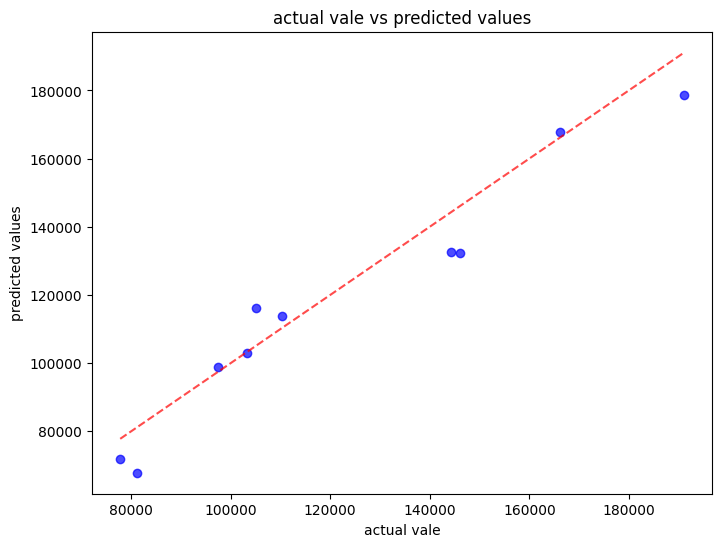

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha = 0.7)
plt.xlabel("actual vale")
plt.ylabel('predicted values')
plt.title('actual vale vs predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color= 'red', alpha=0.7, linestyle='--')
plt.show()